In [1]:
# Interpretation of the charts
    # Rural City-types (oxymoron?) tend to have fewer Pyber drivers and number of rides, but higher fares.  This might be
    #    expected since the distances to get to events, attractions, businesses are likely greater in these areas.  
    # Urban City-types are the mirror image of Rural City-types, since they tend to have many more drivers and rides, 
    #    but the rides may be shorter, maybe a few city blocks, and total fares lower.  
    # Suburban City-type results fall between the Rural and Urban on every variable.
    # Not only do the City-types seem to be on a continuum on every variable, there are only a handful of cities
    #    across types that overlap on the bubble chart (other than on Number of Drivers, where there is greater overlap), 
    #    Pyber probably views these three city types as very different markets and need to apply different strategies
    #    for each. 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os

# clear out previous images of plots if the image files exist
try:
    os.remove('bubble.pdf')
except OSError:
    pass
try:
    os.remove('pie_fares.pdf')
except OSError:
    pass
try:
    os.remove('pie_rides.pdf')
except OSError:
    pass
try:
    os.remove('pie_drivers.pdf')
except OSError:
    pass

# Files to Load 
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_pd = pd.read_csv(city_csv)
ride_pd = pd.read_csv(ride_csv) 

# Combine the data into a single dataset
pyber_pd = pd.merge(ride_pd, city_pd, how="left", on=["city", "city"])

# Removed date since it will not be used
pyber_pd.drop('date', axis=1, inplace=True) 

# Display the data table for preview
pyber_pd.head(5)

,city,fare,ride_id,driver_count,type
0,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,South Michelleport,30.24,2343912425577,72,Urban
2,Port Samanthamouth,33.44,2005065760003,57,Urban
3,Rodneyfort,23.44,5149245426178,34,Urban
4,South Jack,34.58,3908451377344,46,Urban


In [3]:
city_fare_dat = pyber_pd[['city', 'fare']]

In [4]:
# Compute mean fare by city
city_fare_mean = city_fare_dat.groupby(['city']).mean()
city_fare_mean.columns = ['Mean Fare']

In [5]:
# Compute total fares by city
city_fare_sum = city_fare_dat.groupby(['city']).sum()
city_fare_sum.columns = ['Sum of Fares']

In [6]:
# Compute number of rides by city
city_ride_N = city_fare_dat.groupby(['city']).count()
city_ride_N.columns = ['N of Rides']

In [7]:
# Create dictionary to link city type and chart colors
color_dict = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural': 'Gold'}
city_pd['Color']=city_pd['type'].map(color_dict)

In [8]:
# Merge City-level data together into single data frame
city_dat = pd.merge(city_pd, city_fare_mean, how="left", on=["city", "city"])
city_dat = pd.merge(city_dat, city_fare_sum, how="left", on=["city", "city"])
city_dat = pd.merge(city_dat, city_ride_N, how="left", on=["city", "city"])

In [9]:
city_dat.head()

,city,driver_count,type,Color,Mean Fare,Sum of Fares,N of Rides
0,Richardfort,38,Urban,Coral,22.373214,626.45,28
1,Williamsstad,59,Urban,Coral,24.362174,560.33,23
2,Port Angela,67,Urban,Coral,23.836842,452.90,19
3,Rodneyfort,34,Urban,Coral,28.616957,658.19,23
4,West Robert,39,Urban,Coral,25.123871,778.84,31


In [10]:
# Use City-level data to create City-type dataframe
city_type_dat = city_dat.groupby(['type']).sum()

In [11]:
city_type_dat

,driver_count,Mean Fare,Sum of Fares,N of Rides
type,,,,
Rural,78,623.479771,4327.93,125
Suburban,490,1106.542729,19356.33,625
Urban,2405,1616.942033,39854.38,1625


In [12]:
# Prepare the dataframe to use for the upcoming chart legend
legnd = pd.Series(color_dict, name='Color')
legnd.index.name = 'type'
leg_col = legnd.reset_index()

## Bubble Plot of Ride Sharing Data

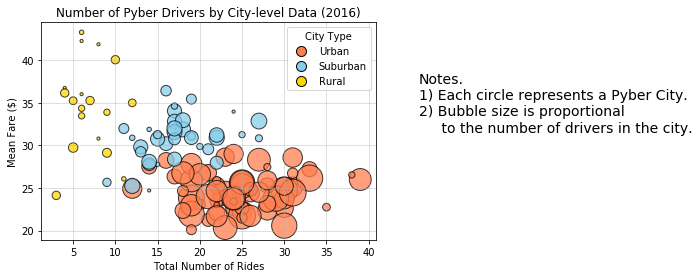

In [13]:
#  Prepare to save the bubble plot
bubble = plt.figure()

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
plt.scatter(city_dat['N of Rides'], city_dat['Mean Fare'], s=city_dat['driver_count']*10, c=city_dat['Color'], 
            alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title("Number of Pyber Drivers by City-level Data (2016)")
plt.xlabel("Total Number of Rides")
plt.ylabel("Mean Fare ($)")

# Create a legend
colors = leg_col['Color']
texts = leg_col['type']
patches = [ plt.plot([],[], marker="o", ms=10, ls="", color=colors[i], markeredgecolor = 'black',
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles = patches, loc = 'best', title = 'City Type')

# Incorporate a text label regarding circle size
plt.gcf().text(1, 0.5, 'Notes.\n1) Each circle represents a Pyber City.\n2) Bubble size is proportional\n     to the number of drivers in the city.', fontsize=14)
plt.grid(alpha=0.5)

# Save Figure
bubble.savefig('bubble.pdf')
plt.show()

In [14]:
# Finish preparing the City-type dataframe for plotting
city_type_dat_sup = pd.merge(city_type_dat, leg_col, how="left", on=["type", "type"])

In [15]:
city_type_dat_sup

,type,driver_count,Mean Fare,Sum of Fares,N of Rides,Color
0,Rural,78,623.479771,4327.93,125,Gold
1,Suburban,490,1106.542729,19356.33,625,SkyBlue
2,Urban,2405,1616.942033,39854.38,1625,Coral


## Total Fares by City Type

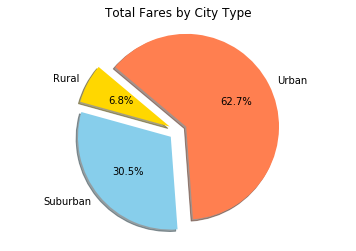

In [16]:
pie_fare = plt.figure()
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_type_dat_sup['Sum of Fares'], explode=[0.1,0.1,0.1], labels=city_type_dat_sup['type'], colors=city_type_dat_sup['Color'],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Total Fares by City Type")
# Save an image of our chart and print the final product to the screen
pie_fare.savefig('pie_fares.pdf')   
plt.show()

## Total Rides by City Type

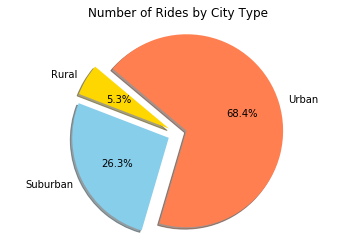

In [17]:
pie_rides = plt.figure()
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_type_dat_sup['N of Rides'], explode=[0.1,0.1,0.1], labels=city_type_dat_sup['type'], colors=city_type_dat_sup['Color'],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Number of Rides by City Type")
# Save an image of our chart and print the final product to the screen
pie_rides.savefig('pie_rides.pdf')   
plt.show()

## Total Drivers by City Type

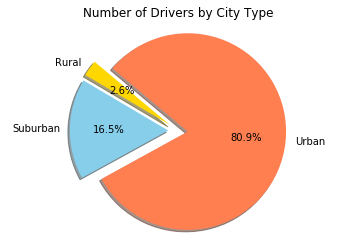

In [18]:
pie_drivers = plt.figure()
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(city_type_dat_sup['driver_count'], explode=[0.1,0.1,0.1], labels=city_type_dat_sup['type'], colors=city_type_dat_sup['Color'],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Number of Drivers by City Type")
# Save an image of our chart and print the final product to the screen
pie_drivers.savefig('pie_drivers.pdf')   
plt.show()